# Author imformation:
Fan Shengzhe, Shanghaijiaotong University, Shanghai, China  
Email: fanshengzhe@sjtu.edu.cn

# 1.读取数据

## 1.1 基本数据的读取

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("drive/My Drive/reco/veg-fru-reco")

In [ ]:
# path_prefix = '.'
# 2023年2月测试colab时发现有bug，相对路径有时候不起作用
# 可以切换为绝对路径解决这个bug
path_prefix = '/content/drive/My Drive/reco/veg-fru-reco'

In [ ]:
import pandas as pd
import os
import tqdm
import gc
import random
import numpy as np
import seaborn as sns

data_dir = os.path.join(path_prefix, 'cache')
save_dir = os.path.join(path_prefix, 'cache')

if not os.path.exists(save_dir):
  os.mkdir(save_dir)

# user_item_label_df = pd.read_csv(os.path.join(data_dir, 'user_item_rank_feats_df.csv'))

In [ ]:
# 节省内存的一个函数
# 减少内存
def reduce_mem(df):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
      c_min = df[col].min()
      c_max = df[col].max()
      if pd.isnull(c_min) or pd.isnull(c_max):
        continue
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
            df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
            df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)
  end_mem = df.memory_usage().sum() / 1024**2
  print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100*(start_mem-end_mem)/start_mem))
  return df

In [ ]:
save_parts = 3

In [ ]:
user_item_label_df_parts = []
for part_index in range(save_parts):
  user_item_label_df_parts.append(reduce_mem(
      pd.read_csv(os.path.join(data_dir, f'user_item_rank_feats_df_part_{part_index}.csv'))))
user_item_label_df = pd.concat(user_item_label_df_parts).reset_index(drop=True)

del user_item_label_df_parts
gc.collect()

-- Mem. usage decreased to 799.82 Mb (67.1% reduction)
-- Mem. usage decreased to 797.25 Mb (67.2% reduction)
-- Mem. usage decreased to 799.82 Mb (67.1% reduction)


0

In [ ]:
user_item_label_df

,user_id,item_id,recall_score,label,timestamp_ms,environment,device_group,os,province,city,...,ctx_diff_last_ua_ctx_time_bucket,ctx_diff_last_ua_ctx_weekday,ctx_diff_last_ua_ctx_yearday,ctx_diff_last_ua_ctx_freshness,ctx_diff_last_ua_ctx_environment,ctx_diff_last_ua_ctx_device_group,ctx_diff_last_ua_ctx_os,ctx_diff_last_ua_ctx_province,ctx_diff_last_ua_ctx_city,ctx_diff_last_ua_ctx_referrer_type
0,0,218355,0.568848,1,1508176867088,0,0,0,0,0,...,0,0,0,289000,1,1,1,1,1,1
1,1,236648,0.161377,1,1508151216865,0,0,0,0,1,...,0,0,0,-31200000,1,1,1,1,1,1
2,2,223931,0.130737,1,1507029713061,0,0,0,0,2,...,0,0,0,219240000,1,1,1,1,1,1
3,3,277492,0.601074,1,1507731677532,0,0,0,0,1,...,0,0,0,14577000,1,1,1,1,1,1
4,4,277107,0.142944,1,1508171185481,0,0,0,0,1,...,0,0,0,-192862000,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045046,249993,145692,0.034332,0,1507849182864,0,0,0,0,10,...,0,0,0,-22748558,1,1,1,1,1,1
4045047,249993,66055,0.034302,0,1507849182864,0,0,0,0,10,...,0,0,0,-22748558,1,1,1,1,1,1
4045048,249993,160132,0.033875,0,1507849182864,0,0,0,0,10,...,0,0,0,-22748558,1,1,1,1,1,1
4045049,249993,276946,0.033783,0,1507849182864,0,0,0,0,10,...,0,0,0,-22748558,1,1,1,1,1,1


## 1.2 训练、验证集划分


In [ ]:
trn_user = pd.read_csv(os.path.join(data_dir, 'trn_user.csv'))
val_and_test_user = pd.read_csv(os.path.join(data_dir, 'val_user.csv'))
num_of_val_and_test_user = val_and_test_user['user_id'].nunique()
val_user = val_and_test_user.sample(frac=0.5, random_state=2022)
test_user = val_and_test_user[~val_and_test_user['user_id'].isin(val_user['user_id'])]

train_user_item_label_df = reduce_mem(user_item_label_df[user_item_label_df['user_id'].isin(trn_user['user_id'])])
val_user_item_label_df = reduce_mem(user_item_label_df[user_item_label_df['user_id'].isin(val_user['user_id'])])
test_user_item_label_df = reduce_mem(user_item_label_df[user_item_label_df['user_id'].isin(test_user['user_id'])])

<ipython-input-5-52ac8e772f82>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int32)
<ipython-input-5-52ac8e772f82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
<ipython-input-5-52ac8e772f82>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

-- Mem. usage decreased to 262.89 Mb (0.0% reduction)
-- Mem. usage decreased to 1083.72 Mb (0.0% reduction)
-- Mem. usage decreased to 1083.72 Mb (0.0% reduction)


In [ ]:
user_item_label_df.columns

Index(['user_id', 'item_id', 'recall_score', 'label', 'timestamp_ms',
       'environment', 'device_group', 'os', 'province', 'city',
       ...
       'ctx_diff_last_ua_ctx_time_bucket', 'ctx_diff_last_ua_ctx_weekday',
       'ctx_diff_last_ua_ctx_yearday', 'ctx_diff_last_ua_ctx_freshness',
       'ctx_diff_last_ua_ctx_environment', 'ctx_diff_last_ua_ctx_device_group',
       'ctx_diff_last_ua_ctx_os', 'ctx_diff_last_ua_ctx_province',
       'ctx_diff_last_ua_ctx_city', 'ctx_diff_last_ua_ctx_referrer_type'],
      dtype='object', length=236)

In [ ]:
# 全量数据只保留最值，以供后续归一化使用
max_val_dict = {}
min_val_dict = {}
for fea_name in user_item_label_df.columns:
  max_val_dict[fea_name] = user_item_label_df[fea_name].max()
  min_val_dict[fea_name] = user_item_label_df[fea_name].min()

del user_item_label_df
gc.collect()

0

# 2.LGBM-GBDT

## 2.1 模型定义和训练

In [ ]:
import lightgbm as lgb

In [ ]:
# 定义特征列
lgb_cols = list(train_user_item_label_df.columns)
lgb_cols.remove('label')

In [ ]:
# 排序模型定义
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=100, reg_alpha=0.0, reg_lambda=1,
                    max_depth=-1, n_estimators=1500, subsample=1., subsample_freq=0, colsample_bytree=1, 
                    learning_rate=0.1, min_child_weight=50, random_state=2022, n_jobs=16, verbose=10) 

In [ ]:
# 排序模型训练
lgb_classifier.fit(train_user_item_label_df[lgb_cols], train_user_item_label_df['label'],
          eval_set=[(val_user_item_label_df[lgb_cols], val_user_item_label_df['label'])], 
          eval_metric=['auc', ], early_stopping_rounds=50, )

[1]	valid_0's binary_logloss: 0.466266	valid_0's auc: 0.93798
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.435277	valid_0's auc: 0.941196
[3]	valid_0's binary_logloss: 0.408974	valid_0's auc: 0.943669
[4]	valid_0's binary_logloss: 0.386316	valid_0's auc: 0.945346
[5]	valid_0's binary_logloss: 0.366692	valid_0's auc: 0.946895
[6]	valid_0's binary_logloss: 0.348835	valid_0's auc: 0.948736
[7]	valid_0's binary_logloss: 0.33297	valid_0's auc: 0.950875
[8]	valid_0's binary_logloss: 0.318855	valid_0's auc: 0.953075
[9]	valid_0's binary_logloss: 0.305849	valid_0's auc: 0.954947
[10]	valid_0's binary_logloss: 0.293495	valid_0's auc: 0.957821
[11]	valid_0's binary_logloss: 0.284112	valid_0's auc: 0.958625
[12]	valid_0's binary_logloss: 0.274662	valid_0's auc: 0.959979
[13]	valid_0's binary_logloss: 0.265948	valid_0's auc: 0.961341
[14]	valid_0's binary_logloss: 0.258717	valid_0's auc: 0.962075
[15]	valid_0's binary_logloss: 0.250204	valid_0's auc

LGBMClassifier(colsample_bytree=1, min_child_weight=50, n_estimators=1500,
               n_jobs=16, num_leaves=100, random_state=2022, reg_lambda=1,
               verbose=10)

## 2.2 特征重要性分析

### 2.2.1 直方图

<Figure size 6480x3240 with 0 Axes>

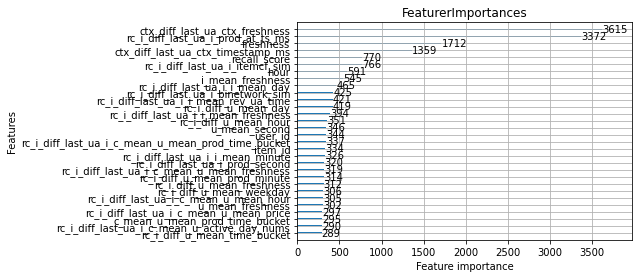

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,45))
lgb.plot_importance(lgb_classifier, max_num_features=30)
plt.title("FeaturerImportances")
plt.show()

### 2.2.2 保存结果

In [ ]:
booster = lgb_classifier.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()

fea_importance_df = pd.DataFrame({'feature_name':feature_name, 'feature_importance': importance})
# feature_importance.to_csv(os.path.join(save_dir, 'feature_importance.csv'),index=False)

In [ ]:
import seaborn as sns

In [ ]:
fea_importance_df = fea_importance_df.sort_values('feature_importance', ascending=[False])
fea_importance_df['feature_importance'] = fea_importance_df['feature_importance'] / fea_importance_df['feature_importance'].sum()

<AxesSubplot:xlabel='feature_importance', ylabel='feature_name'>

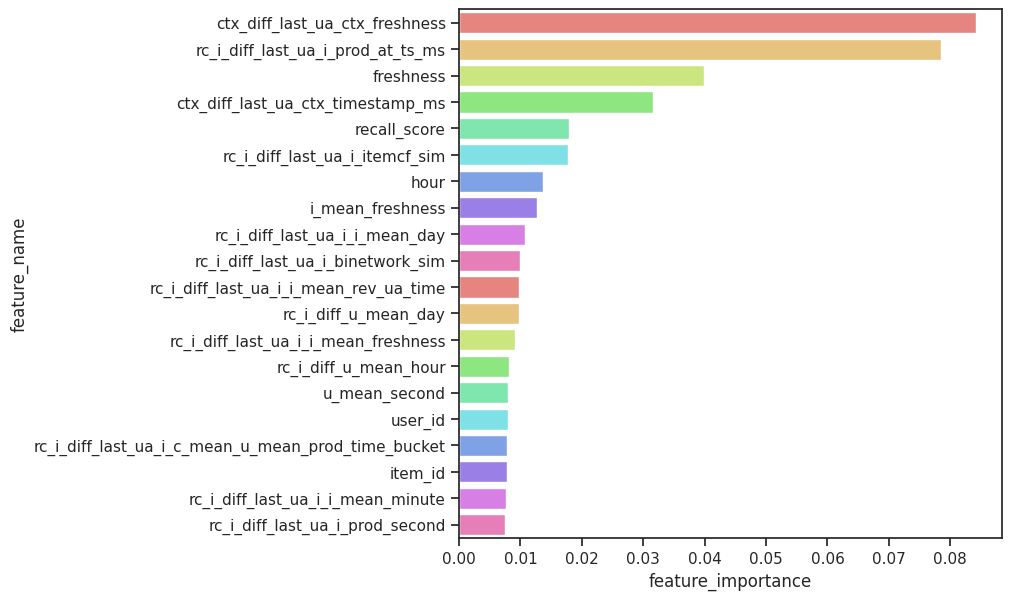

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.set_context({'figure.figsize':[7, 7]})
sns.set_theme(style='ticks')  
sns.barplot(y='feature_name', x='feature_importance', data=fea_importance_df[:20], palette=sns.hls_palette(10, l=.7, s=.9))

## 2.3 预测和评估

### 2.3.1 模型预测

In [ ]:
test_user_item_label_df['lgbm_gbdt_pred'] = lgb_classifier.predict_proba(\
    test_user_item_label_df[lgb_cols], num_iteration=lgb_classifier.best_iteration_)[:, 1]
test_user_item_label_df = reduce_mem(test_user_item_label_df)

<ipython-input-21-418ab0cd6725>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_item_label_df['lgbm_gbdt_pred'] = lgb_classifier.predict_proba(\
<ipython-input-5-52ac8e772f82>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int32)
<ipython-input-5-52ac8e772f82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

-- Mem. usage decreased to 1087.16 Mb (0.9% reduction)


In [ ]:
del lgb_classifier
gc.collect()

8642

### 2.3.2 评估
- AUC
- hit rate
- MRR

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_user_item_label_df['label'], test_user_item_label_df['lgbm_gbdt_pred'])
print('test auc:', metrics.auc(fpr, tpr))

test auc: 0.9966566822453359


In [ ]:
def get_hit_rate_and_mrr(res_df, pred_name='pred', label_name='label', eval_at=[1, 3, 5, 10, 20, 40, 50, 100], need_print=True):
  res_df = res_df[['user_id', 'item_id', pred_name, label_name]].\
            sort_values(['user_id', pred_name], ascending=[True, False])

  hit_rate_list = [0] * len(eval_at)
  mrr_list = [0] * len(eval_at)
  total_user = res_df['user_id'].nunique()

  user_groups = res_df.groupby(['user_id'])

  for _, group in tqdm.tqdm(user_groups):
    try:
      ground_truth_item_id = group[group[label_name]==1]['item_id'].values[0]
    except:
      continue

    preds = group['item_id'].values.tolist()

    rank = 0
    while preds[rank] != ground_truth_item_id:
        rank += 1

    for index, eval_point in enumerate(eval_at):
      if rank < eval_point:
        mrr_list[index] += 1.0 / (rank + 1)
        hit_rate_list[index] += 1

  hit_rate_list = [hit_rate / total_user for hit_rate in hit_rate_list]
  mrr_list = [mrr / total_user for mrr in mrr_list]
  
  if need_print:
    print()
    for index in range(len(eval_at)):
      print(' topk: ', eval_at[index], ' : ', 'hit_rate: ', \
            hit_rate_list[index], 'mrr:', mrr_list[index], 'user_num : ', total_user)
  else:
    return hit_rate_list, mrr_list

In [ ]:
get_hit_rate_and_mrr(test_user_item_label_df, pred_name='lgbm_gbdt_pred')

100%|██████████| 12025/12025 [00:07<00:00, 1683.06it/s]


 topk:  1  :  hit_rate:  0.5433679833679834 mrr: 0.5433679833679834 user_num :  12025
 topk:  3  :  hit_rate:  0.6906444906444906 mrr: 0.6100207900207857 user_num :  12025
 topk:  5  :  hit_rate:  0.7225779625779626 mrr: 0.6174261954261894 user_num :  12025
 topk:  10  :  hit_rate:  0.7397920997920998 mrr: 0.6198265518265469 user_num :  12025
 topk:  20  :  hit_rate:  0.7466112266112266 mrr: 0.620343612235962 user_num :  12025
 topk:  40  :  hit_rate:  0.7487733887733887 mrr: 0.6204236294957858 user_num :  12025
 topk:  50  :  hit_rate:  0.7492723492723493 mrr: 0.6204345237943942 user_num :  12025
 topk:  100  :  hit_rate:  0.7498544698544699 mrr: 0.620443343908437 user_num :  12025


In [ ]:
gc.collect()

0

# 2.LGBM-RF

## 2.1 模型定义和训练

In [ ]:
import lightgbm as lgb

In [ ]:
# 定义特征列
lgb_cols = list(train_user_item_label_df.columns)
lgb_cols.remove('label')

In [ ]:
# 排序模型定义
lgb_classifier = lgb.LGBMClassifier(boosting_type='rf', num_leaves=1000, reg_alpha=0.0, reg_lambda=0.0,
                    max_depth=-1, n_estimators=1500, subsample=0.5, subsample_freq=1, colsample_bytree=1,
                    min_child_weight=1, random_state=2022, n_jobs=16, verbose=10) 

In [ ]:
# 排序模型训练
lgb_classifier.fit(train_user_item_label_df[lgb_cols], train_user_item_label_df['label'],
          eval_set=[(val_user_item_label_df[lgb_cols], val_user_item_label_df['label'])], 
          eval_metric=['auc', ],early_stopping_rounds=50, )

[1]	valid_0's binary_logloss: 0.294496	valid_0's auc: 0.955506
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.267081	valid_0's auc: 0.967031
[3]	valid_0's binary_logloss: 0.263165	valid_0's auc: 0.96872
[4]	valid_0's binary_logloss: 0.260343	valid_0's auc: 0.97039
[5]	valid_0's binary_logloss: 0.257799	valid_0's auc: 0.971623
[6]	valid_0's binary_logloss: 0.256567	valid_0's auc: 0.972294
[7]	valid_0's binary_logloss: 0.255034	valid_0's auc: 0.972915
[8]	valid_0's binary_logloss: 0.254585	valid_0's auc: 0.973257
[9]	valid_0's binary_logloss: 0.254942	valid_0's auc: 0.973306
[10]	valid_0's binary_logloss: 0.254391	valid_0's auc: 0.973566
[11]	valid_0's binary_logloss: 0.254427	valid_0's auc: 0.973527
[12]	valid_0's binary_logloss: 0.254054	valid_0's auc: 0.973782
[13]	valid_0's binary_logloss: 0.253292	valid_0's auc: 0.97404
[14]	valid_0's binary_logloss: 0.253298	valid_0's auc: 0.974105
[15]	valid_0's binary_logloss: 0.25359	valid_0's auc: 

LGBMClassifier(boosting_type='rf', colsample_bytree=1, min_child_weight=1,
               n_estimators=1500, n_jobs=16, num_leaves=1000, random_state=2022,
               subsample=0.5, subsample_freq=1, verbose=10)

## 2.2 特征重要性分析

### 2.2.1 直方图

<Figure size 9000x4500 with 0 Axes>

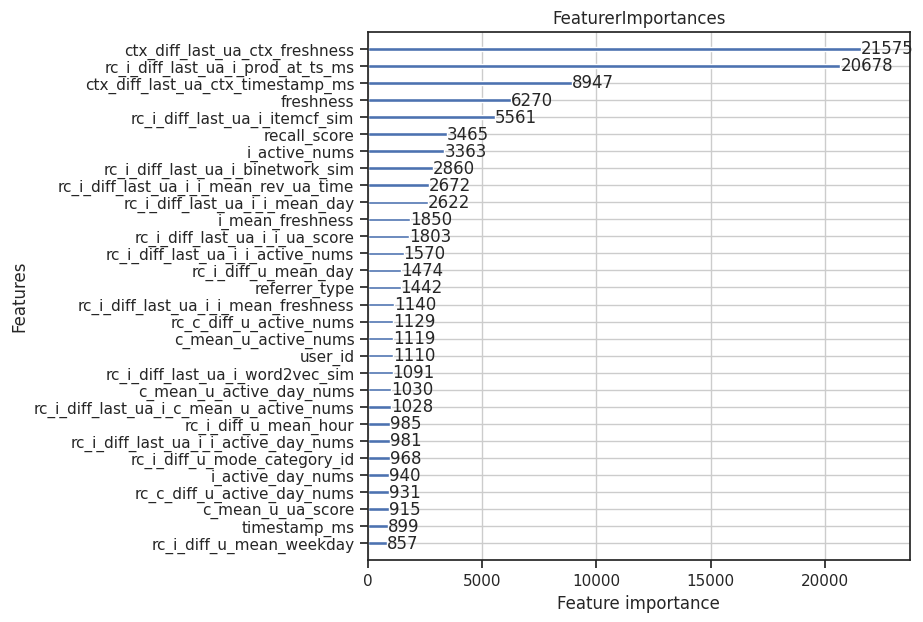

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,45))
lgb.plot_importance(lgb_classifier, max_num_features=30)
plt.title("FeaturerImportances")
plt.show()

### 2.2.2 保存结果

In [ ]:
booster = lgb_classifier.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()

fea_importance_df = pd.DataFrame({'feature_name':feature_name, 'feature_importance': importance})
# feature_importance.to_csv(os.path.join(save_dir, 'feature_importance.csv'),index=False)

In [ ]:
fea_importance_df = fea_importance_df.sort_values('feature_importance', ascending=[False])
fea_importance_df['feature_importance'] = fea_importance_df['feature_importance'] / fea_importance_df['feature_importance'].sum()

<AxesSubplot:xlabel='feature_importance', ylabel='feature_name'>

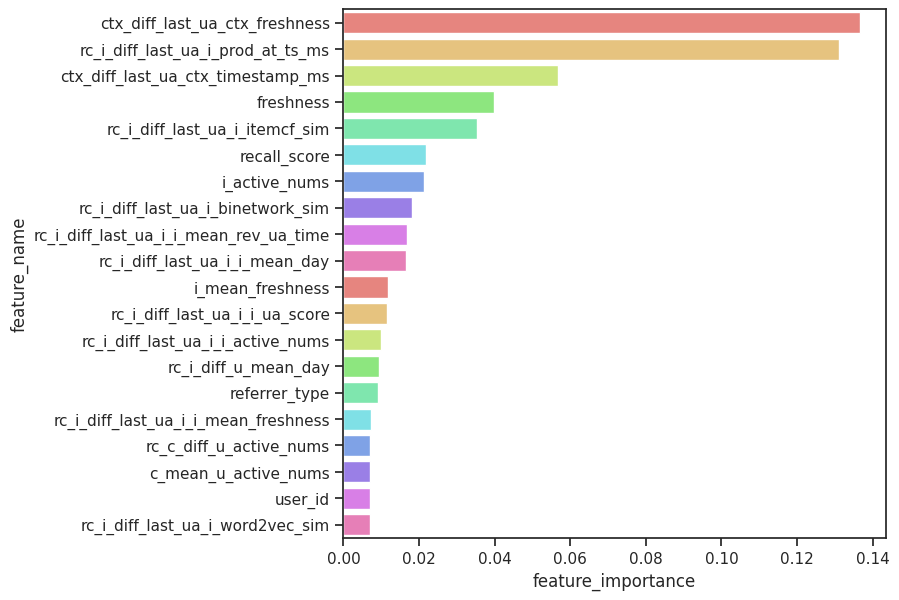

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.set_context({'figure.figsize':[7, 7]})
sns.set_theme(style='ticks')  
sns.barplot(y='feature_name', x='feature_importance', data=fea_importance_df[:20], palette=sns.hls_palette(10, l=.7, s=.9))

## 2.3 预测和评估

### 2.3.1 模型预测

In [ ]:
test_user_item_label_df['lgbm_rf_pred'] = lgb_classifier.predict_proba(\
    test_user_item_label_df[lgb_cols], num_iteration=lgb_classifier.best_iteration_)[:, 1]
test_user_item_label_df = reduce_mem(test_user_item_label_df)

<ipython-input-35-ef098d2bcc01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_item_label_df['lgbm_rf_pred'] = lgb_classifier.predict_proba(\
<ipython-input-5-52ac8e772f82>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int32)
<ipython-input-5-52ac8e772f82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

-- Mem. usage decreased to 1090.60 Mb (0.9% reduction)


In [ ]:
del lgb_classifier
gc.collect()

8391

### 2.3.2 评估
- AUC
- hit rate
- MRR

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_user_item_label_df['label'], test_user_item_label_df['lgbm_rf_pred'])
print('test auc:', metrics.auc(fpr, tpr))

test auc: 0.9756307136345473


In [ ]:
def get_hit_rate_and_mrr(res_df, pred_name='pred', label_name='label', eval_at=[1, 3, 5, 10, 20, 40, 50, 100], need_print=True):
  res_df = res_df[['user_id', 'item_id', pred_name, label_name]].\
            sort_values(['user_id', pred_name], ascending=[True, False])

  hit_rate_list = [0] * len(eval_at)
  mrr_list = [0] * len(eval_at)
  total_user = res_df['user_id'].nunique()

  user_groups = res_df.groupby(['user_id'])

  for _, group in tqdm.tqdm(user_groups):
    try:
      ground_truth_item_id = group[group[label_name]==1]['item_id'].values[0]
    except:
      continue

    preds = group['item_id'].values.tolist()

    rank = 0
    while preds[rank] != ground_truth_item_id:
        rank += 1

    for index, eval_point in enumerate(eval_at):
      if rank < eval_point:
        mrr_list[index] += 1.0 / (rank + 1)
        hit_rate_list[index] += 1

  hit_rate_list = [hit_rate / total_user for hit_rate in hit_rate_list]
  mrr_list = [mrr / total_user for mrr in mrr_list]
  
  if need_print:
    print()
    for index in range(len(eval_at)):
      print(' topk: ', eval_at[index], ' : ', 'hit_rate: ', \
            hit_rate_list[index], 'mrr:', mrr_list[index], 'user_num : ', total_user)
  else:
    return hit_rate_list, mrr_list

In [ ]:
get_hit_rate_and_mrr(test_user_item_label_df, pred_name='lgbm_rf_pred')

100%|██████████| 12025/12025 [00:07<00:00, 1632.70it/s]


 topk:  1  :  hit_rate:  0.30195426195426195 mrr: 0.30195426195426195 user_num :  12025
 topk:  3  :  hit_rate:  0.49555093555093555 mrr: 0.386528066528067 user_num :  12025
 topk:  5  :  hit_rate:  0.5788773388773388 mrr: 0.40555509355508956 user_num :  12025
 topk:  10  :  hit_rate:  0.6582120582120582 mrr: 0.41653004653004383 user_num :  12025
 topk:  20  :  hit_rate:  0.7110187110187111 mrr: 0.4203409343785578 user_num :  12025
 topk:  40  :  hit_rate:  0.7365488565488566 mrr: 0.4212803755688699 user_num :  12025
 topk:  50  :  hit_rate:  0.7422037422037422 mrr: 0.42140450794824746 user_num :  12025
 topk:  100  :  hit_rate:  0.7488565488565488 mrr: 0.4215045055019899 user_num :  12025


In [ ]:
gc.collect()

0

# 2.LGBM-GOSS

## 2.1 模型定义和训练

In [ ]:
import lightgbm as lgb

In [ ]:
# 定义特征列
lgb_cols = list(train_user_item_label_df.columns)
lgb_cols.remove('label')

In [ ]:
# 排序模型定义
lgb_classifier = lgb.LGBMClassifier(boosting_type='goss', num_leaves=200, reg_alpha=0.0, reg_lambda=1,
                    max_depth=-1, n_estimators=1500, subsample=1., subsample_freq=0, colsample_bytree=0.8, 
                    learning_rate=0.1, min_child_weight=50, random_state=2022, n_jobs=16, verbose=10)

In [ ]:
# 排序模型训练
lgb_classifier.fit(train_user_item_label_df[lgb_cols], train_user_item_label_df['label'],
          eval_set=[(val_user_item_label_df[lgb_cols], val_user_item_label_df['label'])], 
          eval_metric=['auc', ], early_stopping_rounds=50, )

[1]	valid_0's binary_logloss: 0.468867	valid_0's auc: 0.922853
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.437324	valid_0's auc: 0.942948
[3]	valid_0's binary_logloss: 0.40995	valid_0's auc: 0.947767
[4]	valid_0's binary_logloss: 0.384119	valid_0's auc: 0.954978
[5]	valid_0's binary_logloss: 0.364778	valid_0's auc: 0.954973
[6]	valid_0's binary_logloss: 0.345315	valid_0's auc: 0.957792
[7]	valid_0's binary_logloss: 0.330837	valid_0's auc: 0.957568
[8]	valid_0's binary_logloss: 0.316298	valid_0's auc: 0.959337
[9]	valid_0's binary_logloss: 0.300258	valid_0's auc: 0.963115
[10]	valid_0's binary_logloss: 0.288523	valid_0's auc: 0.964093
[11]	valid_0's binary_logloss: 0.27613	valid_0's auc: 0.966498
[12]	valid_0's binary_logloss: 0.264779	valid_0's auc: 0.968403
[13]	valid_0's binary_logloss: 0.256081	valid_0's auc: 0.969111
[14]	valid_0's binary_logloss: 0.248457	valid_0's auc: 0.96967
[15]	valid_0's binary_logloss: 0.240333	valid_0's auc:

LGBMClassifier(boosting_type='goss', colsample_bytree=0.8, min_child_weight=50,
               n_estimators=1500, n_jobs=16, num_leaves=200, random_state=2022,
               reg_lambda=1, verbose=10)

## 2.2 特征重要性分析

### 2.2.1 直方图

<Figure size 9000x4500 with 0 Axes>

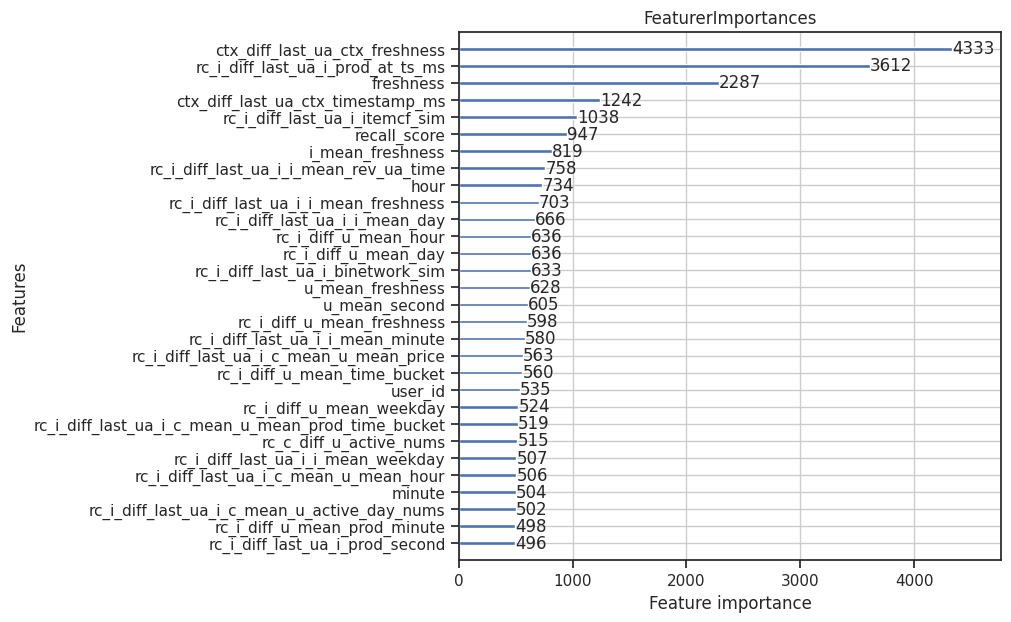

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90,45))
lgb.plot_importance(lgb_classifier, max_num_features=30)
plt.title("FeaturerImportances")
plt.show()

### 2.2.2 保存结果

In [ ]:
booster = lgb_classifier.booster_
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()

fea_importance_df = pd.DataFrame({'feature_name':feature_name, 'feature_importance': importance})
# feature_importance.to_csv(os.path.join(save_dir, 'feature_importance.csv'),index=False)

In [ ]:
import seaborn as sns

In [ ]:
fea_importance_df = fea_importance_df.sort_values('feature_importance', ascending=[False])
fea_importance_df['feature_importance'] = fea_importance_df['feature_importance'] / fea_importance_df['feature_importance'].sum()

<AxesSubplot:xlabel='feature_importance', ylabel='feature_name'>

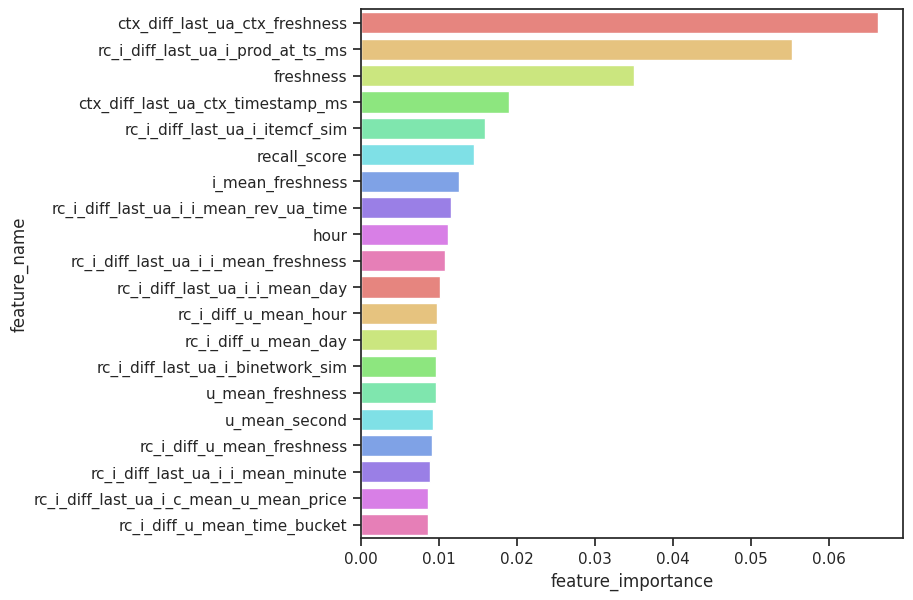

In [ ]:
plt.rcParams['figure.dpi'] = 100
sns.set_context({'figure.figsize':[7, 7]})
sns.set_theme(style='ticks')  
sns.barplot(y='feature_name', x='feature_importance', data=fea_importance_df[:20], palette=sns.hls_palette(10, l=.7, s=.9))

## 2.3 预测和评估

### 2.3.1 模型预测

In [ ]:
test_user_item_label_df['lgbm_goss_pred'] = lgb_classifier.predict_proba(\
    test_user_item_label_df[lgb_cols], num_iteration=lgb_classifier.best_iteration_)[:, 1]
test_user_item_label_df = reduce_mem(test_user_item_label_df)

<ipython-input-50-63ac241f417d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_item_label_df['lgbm_goss_pred'] = lgb_classifier.predict_proba(\
<ipython-input-5-52ac8e772f82>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int32)
<ipython-input-5-52ac8e772f82>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

-- Mem. usage decreased to 1094.04 Mb (0.9% reduction)


In [ ]:
del lgb_classifier
gc.collect()

8391

### 2.3.2 评估
- AUC
- hit rate
- MRR

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_user_item_label_df['label'], test_user_item_label_df['lgbm_goss_pred'])
print('test auc:', metrics.auc(fpr, tpr))

test auc: 0.9961613821912938


In [ ]:
def get_hit_rate_and_mrr(res_df, pred_name='pred', label_name='label', eval_at=[1, 3, 5, 10, 20, 40, 50, 100], need_print=True):
  res_df = res_df[['user_id', 'item_id', pred_name, label_name]].\
            sort_values(['user_id', pred_name], ascending=[True, False])

  hit_rate_list = [0] * len(eval_at)
  mrr_list = [0] * len(eval_at)
  total_user = res_df['user_id'].nunique()

  user_groups = res_df.groupby(['user_id'])

  for _, group in tqdm.tqdm(user_groups):
    try:
      ground_truth_item_id = group[group[label_name]==1]['item_id'].values[0]
    except:
      continue

    preds = group['item_id'].values.tolist()

    rank = 0
    while preds[rank] != ground_truth_item_id:
        rank += 1

    for index, eval_point in enumerate(eval_at):
      if rank < eval_point:
        mrr_list[index] += 1.0 / (rank + 1)
        hit_rate_list[index] += 1

  hit_rate_list = [hit_rate / total_user for hit_rate in hit_rate_list]
  mrr_list = [mrr / total_user for mrr in mrr_list]
  
  if need_print:
    print()
    for index in range(len(eval_at)):
      print(' topk: ', eval_at[index], ' : ', 'hit_rate: ', \
            hit_rate_list[index], 'mrr:', mrr_list[index], 'user_num : ', total_user)
  else:
    return hit_rate_list, mrr_list

In [ ]:
get_hit_rate_and_mrr(test_user_item_label_df, pred_name='lgbm_goss_pred')

100%|██████████| 12025/12025 [00:07<00:00, 1636.25it/s]


 topk:  1  :  hit_rate:  0.5260706860706861 mrr: 0.5260706860706861 user_num :  12025
 topk:  3  :  hit_rate:  0.6825779625779625 mrr: 0.5971864171864131 user_num :  12025
 topk:  5  :  hit_rate:  0.7180873180873181 mrr: 0.6054109494109435 user_num :  12025
 topk:  10  :  hit_rate:  0.7390436590436591 mrr: 0.6083567963567919 user_num :  12025
 topk:  20  :  hit_rate:  0.7461122661122661 mrr: 0.6088951366341169 user_num :  12025
 topk:  40  :  hit_rate:  0.7488565488565488 mrr: 0.6089969495340977 user_num :  12025
 topk:  50  :  hit_rate:  0.7491891891891892 mrr: 0.6090042392291766 user_num :  12025
 topk:  100  :  hit_rate:  0.7498544698544699 mrr: 0.6090147148817189 user_num :  12025


In [ ]:
gc.collect()

0

# 3.DNN

## 3.1 导包

In [ ]:
!pip install tensorflow==2.3.0
# 不要使用2.2.0版本，有内存泄漏，会oom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: gast
    Found existing installa

In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
! /opt/bin/nvidia-smi

/bin/bash: /opt/bin/nvidia-smi: No such file or directory


In [ ]:
try:
  import deepctr
except:
  !pip install deepctr
  import deepctr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 KB 5.0 MB/s eta 0:00:00


In [ ]:
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from deepctr.models import dcnmix
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

## 3.2 特征预处理
- 特征分组
- 稠密特征归一化

In [ ]:
# list(train_user_item_label_df.columns)

In [ ]:
# 因为dnn的预处理和LGBM不一样，所以需要额外独立一份数据
dnn_train_user_item_label_df = reduce_mem(train_user_item_label_df.copy(deep=True))
dnn_val_user_item_label_df = reduce_mem(val_user_item_label_df.copy(deep=True))
dnn_test_user_item_label_df = reduce_mem(test_user_item_label_df.copy(deep=True))

-- Mem. usage decreased to 262.89 Mb (0.0% reduction)
-- Mem. usage decreased to 1083.72 Mb (0.0% reduction)
-- Mem. usage decreased to 1094.04 Mb (0.0% reduction)


### 3.2.1 特征分组

In [ ]:
sparse_fea_names = ['user_id',
 'item_id',
 'environment',
 'device_group',
 'os',
 'province',
 'city',
 'referrer_type',
 'u_mode_category_id',
 'u_mode_environment',
 'u_mode_device_group',
 'u_mode_os',
 'u_mode_province',
 'u_mode_city',
 'u_mode_referrer_type',
 'category_id',
 'i_mode_environment',
 'i_mode_device_group',
 'i_mode_os',
 'i_mode_province',
 'i_mode_city',
 'i_mode_referrer_type',
 'c_mode_u_mode_category_id',
 'c_mode_u_mode_environment',
 'c_mode_u_mode_device_group',
 'c_mode_u_mode_os',
 'c_mode_u_mode_province',
 'c_mode_u_mode_city',
 'c_mode_u_mode_referrer_type',
 'rc_i_diff_last_ua_i_category_id',
 'rc_i_diff_last_ua_i_i_mode_environment',
 'rc_i_diff_last_ua_i_i_mode_device_group',
 'rc_i_diff_last_ua_i_i_mode_os',
 'rc_i_diff_last_ua_i_i_mode_province',
 'rc_i_diff_last_ua_i_i_mode_city',
 'rc_i_diff_last_ua_i_i_mode_referrer_type',
 'rc_i_diff_last_ua_i_c_mode_u_mode_category_id',
 'rc_i_diff_last_ua_i_c_mode_u_mode_environment',
 'rc_i_diff_last_ua_i_c_mode_u_mode_device_group',
 'rc_i_diff_last_ua_i_c_mode_u_mode_os',
 'rc_i_diff_last_ua_i_c_mode_u_mode_province',
 'rc_i_diff_last_ua_i_c_mode_u_mode_city',
 'rc_i_diff_last_ua_i_c_mode_u_mode_referrer_type',
 'rc_i_diff_u_mode_category_id',
 'rc_i_diff_u_mode_environment',
 'rc_i_diff_u_mode_device_group',
 'rc_i_diff_u_mode_os',
 'rc_i_diff_u_mode_province',
 'rc_i_diff_u_mode_city',
 'rc_i_diff_u_mode_referrer_type',
 'rc_c_diff_u_mode_category_id',
 'rc_c_diff_u_mode_environment',
 'rc_c_diff_u_mode_device_group',
 'rc_c_diff_u_mode_os',
 'rc_c_diff_u_mode_province',
 'rc_c_diff_u_mode_city',
 'rc_c_diff_u_mode_referrer_type',
 'ctx_diff_last_ua_ctx_environment',
 'ctx_diff_last_ua_ctx_device_group',
 'ctx_diff_last_ua_ctx_os',
 'ctx_diff_last_ua_ctx_province',
 'ctx_diff_last_ua_ctx_city',
 'ctx_diff_last_ua_ctx_referrer_type']

dense_fea_names = [
 'recall_score',
 'timestamp_ms',
 'timestamp_s',
 'day',
 'hour',
 'minute',
 'second',
 'time_bucket',
 'weekday',
 'yearday',
 'freshness',
 'u_mean_day',
 'u_mean_hour',
 'u_mean_minute',
 'u_mean_second',
 'u_mean_time_bucket',
 'u_mean_weekday',
 'u_mean_yearday',
 'u_mean_prod_year',
 'u_mean_prod_month',
 'u_mean_prod_day',
 'u_mean_prod_hour',
 'u_mean_prod_minute',
 'u_mean_prod_season',
 'u_mean_prod_time_bucket',
 'u_mean_prod_weekday',
 'u_mean_prod_yearday',
 'u_mean_price',
 'u_active_nums',
 'u_active_day_nums',
 'u_mean_rev_ua_time',
 'u_ua_score',
 'u_mean_freshness',
 'prod_at_ts_ms',
 'price',
 'prod_at_ts_s',
 'prod_year',
 'prod_month',
 'prod_day',
 'prod_hour',
 'prod_minute',
 'prod_second',
 'prod_season',
 'prod_time_bucket',
 'prod_weekday',
 'prod_yearday',
 'i_mean_day',
 'i_mean_hour',
 'i_mean_minute',
 'i_mean_time_bucket',
 'i_mean_weekday',
 'i_mean_yearday',
 'i_active_nums',
 'i_active_day_nums',
 'i_mean_rev_ua_time',
 'i_ua_score',
 'i_mean_freshness',
 'c_mean_u_mean_day',
 'c_mean_u_mean_hour',
 'c_mean_u_mean_minute',
 'c_mean_u_mean_time_bucket',
 'c_mean_u_mean_weekday',
 'c_mean_u_mean_yearday',
 'c_mean_u_mean_prod_year',
 'c_mean_u_mean_prod_month',
 'c_mean_u_mean_prod_day',
 'c_mean_u_mean_prod_hour',
 'c_mean_u_mean_prod_minute',
 'c_mean_u_mean_prod_season',
 'c_mean_u_mean_prod_time_bucket',
 'c_mean_u_mean_prod_weekday',
 'c_mean_u_mean_prod_yearday',
 'c_mean_u_mean_price',
 'c_mean_u_active_nums',
 'c_mean_u_active_day_nums',
 'c_mean_u_mean_rev_ua_time',
 'c_mean_u_ua_score',
 'c_mean_u_mean_freshness',
 'rc_i_diff_last_ua_i_prod_at_ts_ms',
 'rc_i_diff_last_ua_i_price',
 'rc_i_diff_last_ua_i_prod_year',
 'rc_i_diff_last_ua_i_prod_month',
 'rc_i_diff_last_ua_i_prod_day',
 'rc_i_diff_last_ua_i_prod_hour',
 'rc_i_diff_last_ua_i_prod_minute',
 'rc_i_diff_last_ua_i_prod_second',
 'rc_i_diff_last_ua_i_prod_season',
 'rc_i_diff_last_ua_i_prod_time_bucket',
 'rc_i_diff_last_ua_i_prod_weekday',
 'rc_i_diff_last_ua_i_prod_yearday',
 'rc_i_diff_last_ua_i_i_mean_day',
 'rc_i_diff_last_ua_i_i_mean_hour',
 'rc_i_diff_last_ua_i_i_mean_minute',
 'rc_i_diff_last_ua_i_i_mean_time_bucket',
 'rc_i_diff_last_ua_i_i_mean_weekday',
 'rc_i_diff_last_ua_i_i_mean_yearday',
 'rc_i_diff_last_ua_i_i_active_nums',
 'rc_i_diff_last_ua_i_i_active_day_nums',
 'rc_i_diff_last_ua_i_i_mean_rev_ua_time',
 'rc_i_diff_last_ua_i_i_ua_score',
 'rc_i_diff_last_ua_i_i_mean_freshness',
 'rc_i_diff_last_ua_i_category_id',
 'rc_i_diff_last_ua_i_c_mean_u_mean_day',
 'rc_i_diff_last_ua_i_c_mean_u_mean_hour',
 'rc_i_diff_last_ua_i_c_mean_u_mean_minute',
 'rc_i_diff_last_ua_i_c_mean_u_mean_time_bucket',
 'rc_i_diff_last_ua_i_c_mean_u_mean_weekday',
 'rc_i_diff_last_ua_i_c_mean_u_mean_yearday',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_year',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_month',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_day',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_hour',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_minute',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_season',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_time_bucket',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_weekday',
 'rc_i_diff_last_ua_i_c_mean_u_mean_prod_yearday',
 'rc_i_diff_last_ua_i_c_mean_u_mean_price',
 'rc_i_diff_last_ua_i_c_mean_u_active_nums',
 'rc_i_diff_last_ua_i_c_mean_u_active_day_nums',
 'rc_i_diff_last_ua_i_c_mean_u_mean_rev_ua_time',
 'rc_i_diff_last_ua_i_c_mean_u_ua_score',
 'rc_i_diff_last_ua_i_c_mean_u_mean_freshness',
 'rc_i_diff_last_ua_i_itemcf_sim',
 'rc_i_diff_last_ua_i_binetwork_sim',
 'rc_i_diff_last_ua_i_word2vec_sim',
 'rc_i_diff_u_mean_day',
 'rc_i_diff_u_mean_hour',
 'rc_i_diff_u_mean_minute',
 'rc_i_diff_u_mean_time_bucket',
 'rc_i_diff_u_mean_weekday',
 'rc_i_diff_u_mean_yearday',
 'rc_i_diff_u_mean_prod_year',
 'rc_i_diff_u_mean_prod_month',
 'rc_i_diff_u_mean_prod_day',
 'rc_i_diff_u_mean_prod_hour',
 'rc_i_diff_u_mean_prod_minute',
 'rc_i_diff_u_mean_prod_season',
 'rc_i_diff_u_mean_prod_time_bucket',
 'rc_i_diff_u_mean_prod_weekday',
 'rc_i_diff_u_mean_prod_yearday',
 'rc_i_diff_u_mean_price',
 'rc_i_diff_u_mean_freshness',
 'rc_c_diff_u_mean_day',
 'rc_c_diff_u_mean_hour',
 'rc_c_diff_u_mean_minute',
 'rc_c_diff_u_mean_time_bucket',
 'rc_c_diff_u_mean_weekday',
 'rc_c_diff_u_mean_yearday',
 'rc_c_diff_u_mean_prod_year',
 'rc_c_diff_u_mean_prod_month',
 'rc_c_diff_u_mean_prod_day',
 'rc_c_diff_u_mean_prod_hour',
 'rc_c_diff_u_mean_prod_minute',
 'rc_c_diff_u_mean_prod_season',
 'rc_c_diff_u_mean_prod_time_bucket',
 'rc_c_diff_u_mean_prod_weekday',
 'rc_c_diff_u_mean_prod_yearday',
 'rc_c_diff_u_mean_price',
 'rc_c_diff_u_active_nums',
 'rc_c_diff_u_active_day_nums',
 'rc_c_diff_u_mean_rev_ua_time',
 'rc_c_diff_u_ua_score',
 'rc_c_diff_u_mean_freshness',
 'ctx_diff_last_ua_ctx_timestamp_ms',
 'ctx_diff_last_ua_ctx_day',
 'ctx_diff_last_ua_ctx_hour',
 'ctx_diff_last_ua_ctx_minute',
 'ctx_diff_last_ua_ctx_second',
 'ctx_diff_last_ua_ctx_time_bucket',
 'ctx_diff_last_ua_ctx_weekday',
 'ctx_diff_last_ua_ctx_yearday',
 'ctx_diff_last_ua_ctx_freshness',
 ]
# w2v emb和内容理解emb
emb_fea_names = {}

In [ ]:
len(dense_fea_names) + len(sparse_fea_names)

236

### 3.2.2 稠密特征归一化

In [ ]:
def normalizer(df, fea_name, max_val_dict=None, min_val_dict=None):
  if max_val_dict and min_val_dict:
    max_val = max_val_dict[fea_name]
    min_val = min_val_dict[fea_name]
  else:
    max_val = df[fea_name].max()
    min_val = df[fea_name].min()
  df[fea_name] = (df[fea_name] - min_val) / (max_val - min_val)

In [ ]:
for fea_name in dense_fea_names:
  normalizer(dnn_train_user_item_label_df, fea_name, max_val_dict, min_val_dict)
  normalizer(dnn_val_user_item_label_df, fea_name, max_val_dict, min_val_dict)
  normalizer(dnn_test_user_item_label_df, fea_name, max_val_dict, min_val_dict)

### 3.2.3 nan值填充
- sparse特征填充为一个新类别
- dense特征填充为0 

In [ ]:
for fea_name in sparse_fea_names:
  dnn_train_user_item_label_df[fea_name] = dnn_train_user_item_label_df[fea_name].fillna(max_val_dict[fea_name]+1)
  dnn_val_user_item_label_df[fea_name] = dnn_val_user_item_label_df[fea_name].fillna(max_val_dict[fea_name]+1)
  dnn_test_user_item_label_df[fea_name] = dnn_test_user_item_label_df[fea_name].fillna(max_val_dict[fea_name]+1)

for fea_name in dense_fea_names:
  dnn_train_user_item_label_df[fea_name] = dnn_train_user_item_label_df[fea_name].fillna(0)
  dnn_val_user_item_label_df[fea_name] = dnn_val_user_item_label_df[fea_name].fillna(0)
  dnn_test_user_item_label_df[fea_name] = dnn_test_user_item_label_df[fea_name].fillna(0)

In [ ]:
dnn_val_user_item_label_df.isna().sum().sum()

0

## 3.3 定义feature column

In [ ]:
# sparse features
sparse_feature_columns = []
for fea_name in sparse_fea_names:
  fc = SparseFeat(fea_name, vocabulary_size=int(max_val_dict[fea_name]+2), 
            embedding_dim=1+int((max_val_dict[fea_name]+1)**0.25))
  sparse_feature_columns.append(fc)

# dense_features
dense_feature_columns = []
for fea_name in dense_fea_names:
  fc = DenseFeat(fea_name, 1)
  dense_feature_columns.append(fc)

dnn_feature_columns = sparse_feature_columns + dense_feature_columns

## 3.4 模型定义和训练

### 3.4.1 模型输入

In [ ]:
# 定义feature column
# DNN
dnn_feature_columns = sparse_feature_columns + dense_feature_columns

# FM
linear_feature_columns = sparse_feature_columns + dense_feature_columns

In [ ]:
# 建立feature column和输入数据的联系。
# 此时的x和y都是dict，key是feature column的name，value是np.array形式的数值
fc_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

train_x = {fc_name: dnn_train_user_item_label_df[fc_name].values for fc_name in fc_names}
train_y = dnn_train_user_item_label_df['label'].values
val_x = {fc_name: dnn_val_user_item_label_df[fc_name].values for fc_name in fc_names}
val_y = dnn_val_user_item_label_df['label'].values
test_x = {fc_name: dnn_test_user_item_label_df[fc_name].values for fc_name in fc_names}
test_y = dnn_test_user_item_label_df['label'].values

### 3.4.2 模型定义

In [ ]:
LEARNING_RATE = 1e-3
TRN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 512

In [ ]:
# from tensorflow.python.keras.engine.base_layer import Layer
# class Swish(Layer):
#   def __init__(self, beta=1, **kwargs):
#     super(Swish, self).__init__(**kwargs)
#     self.beta = beta

#   def call(self, inputs):
#     return inputs * (tf.nn.sigmoid(self.beta * inputs))

In [ ]:
dnn = dcnmix.DCNMix(linear_feature_columns, dnn_feature_columns, dnn_hidden_units=(16, 8),
          l2_reg_linear=0.0001, l2_reg_embedding=0.0001, dnn_dropout=0.1,
          dnn_activation='relu', dnn_use_bn=True,
          task='binary')

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999)
dnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

### 3.4.3 训练

In [ ]:
ckpt_path = os.path.join(save_dir, 'dnn_best_weights.hdf5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(ckpt_path, monitor='val_auc',
                  verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = dnn.fit(train_x, train_y, batch_size=TRN_BATCH_SIZE, verbose=1, 
          epochs=15, validation_data=(val_x, val_y), callbacks=callbacks_list)

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:431: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


6837/6837 [==============================] - ETA: 0s - loss: 0.3449 - auc: 0.9305
Epoch 00001: val_auc improved from -inf to 0.93977, saving model to /content/drive/My Drive/reco/veg-fru-reco/cache/dnn_best_weights.hdf5
6837/6837 [==============================] - 1765s 258ms/step - loss: 0.3449 - auc: 0.9305 - val_loss: 0.2785 - val_auc: 0.9398
Epoch 2/15
6837/6837 [==============================] - ETA: 0s - loss: 0.3177 - auc: 0.9443
Epoch 00002: val_auc improved from 0.93977 to 0.94298, saving model to /content/drive/My Drive/reco/veg-fru-reco/cache/dnn_best_weights.hdf5
6837/6837 [==============================] - 1806s 264ms/step - loss: 0.3177 - auc: 0.9443 - val_loss: 0.2843 - val_auc: 0.9430
Epoch 3/15
6837/6837 [==============================] - ETA: 0s - loss: 0.3096 - auc: 0.9474
Epoch 00003: val_auc improved from 0.94298 to 0.94366, saving model to /content/drive/My Drive/reco/veg-fru-reco/cache/dnn_best_weights.hdf5
6837/6837 [==============================] - 1950s 285ms

### 3.4.4 作图

In [ ]:
loss_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
loss_df = loss_df.rename(columns={'loss': 'train_loss'})
loss_df['epoch'] = range(1, len(loss_df)+1)
loss_df = pd.melt(loss_df, ['epoch'])

<AxesSubplot:xlabel='epoch', ylabel='value'>

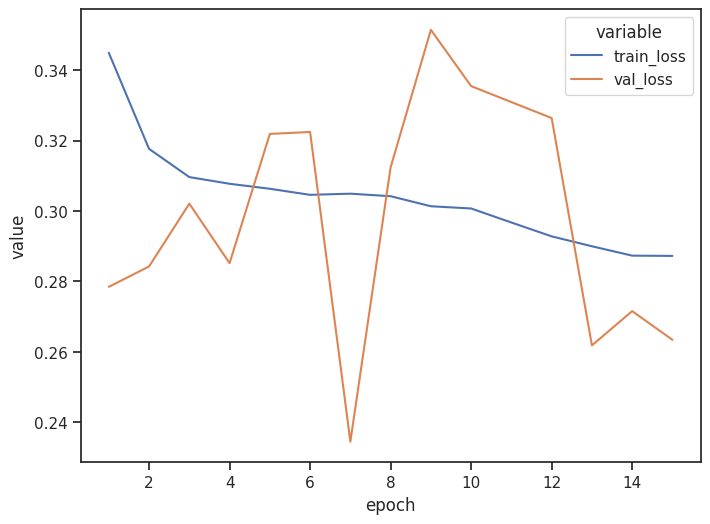

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
sns.set_context({'figure.figsize':[8, 6]})
sns.set_theme(style='ticks') 

sns.lineplot(data=loss_df, x='epoch', y='value', hue='variable')

In [ ]:
AUC_df = pd.DataFrame(history.history)[['auc', 'val_auc']]
AUC_df = AUC_df.rename(columns={'auc': 'train_AUC'})
AUC_df['epoch'] = range(1, len(AUC_df)+1)
AUC_df = pd.melt(AUC_df, ['epoch'])

<AxesSubplot:xlabel='epoch', ylabel='value'>

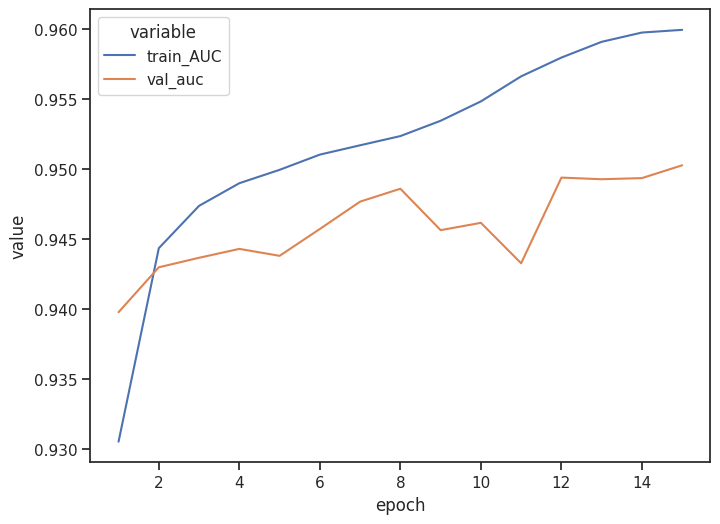

In [ ]:
sns.lineplot(data=AUC_df, x='epoch', y='value', hue='variable')

 ## 3.6 预测和评估

### 3.6.1 模型预测

In [ ]:
dnn.load_weights(ckpt_path)
dnn_test_user_item_label_df['dnn_pred'] = dnn.predict(test_x, batch_size=VAL_BATCH_SIZE, verbose=1)
dnn_test_user_item_label_df = reduce_mem(dnn_test_user_item_label_df)

3523/3523 [==============================] - 88s 25ms/step
-- Mem. usage decreased to 756.88 Mb (51.4% reduction)


In [ ]:
os.remove(ckpt_path) 
del dnn
gc.collect()

31183

### 3.6.2 评估

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(dnn_test_user_item_label_df['label'], dnn_test_user_item_label_df['dnn_pred'])
print('test auc:', metrics.auc(fpr, tpr))

test auc: 0.9510822413799208


In [ ]:
get_hit_rate_and_mrr(dnn_test_user_item_label_df, pred_name='dnn_pred')

100%|██████████| 12025/12025 [00:07<00:00, 1605.65it/s]


 topk:  1  :  hit_rate:  0.15517671517671516 mrr: 0.15517671517671516 user_num :  12025
 topk:  3  :  hit_rate:  0.32623700623700624 mrr: 0.22859320859321017 user_num :  12025
 topk:  5  :  hit_rate:  0.42494802494802497 mrr: 0.2511254331254343 user_num :  12025
 topk:  10  :  hit_rate:  0.5542619542619542 mrr: 0.2684241164241179 user_num :  12025
 topk:  20  :  hit_rate:  0.6534719334719334 mrr: 0.27542506538315104 user_num :  12025
 topk:  40  :  hit_rate:  0.7190852390852391 mrr: 0.2778225781459793 user_num :  12025
 topk:  50  :  hit_rate:  0.7312266112266113 mrr: 0.27809613798018584 user_num :  12025
 topk:  100  :  hit_rate:  0.7490228690228691 mrr: 0.2783784516302499 user_num :  12025


In [ ]:
del dnn_train_user_item_label_df
del dnn_val_user_item_label_df
del dnn_test_user_item_label_df

In [ ]:
gc.collect()

0

# 4.Stacking

[参考资料](http://t.zoukankan.com/geeksongs-p-15416820.html)

## 4.1 base classifier

### 4.1.1 LGBM-GBDT

In [ ]:
import lightgbm as lgb

In [ ]:
# 定义特征列
lgb_cols = list(train_user_item_label_df.columns)
lgb_cols.remove('label')

In [ ]:
import numpy as np

In [ ]:
# 在用户维度切分数据集，做交叉验证
def s_cv_get_kfold_users(trn_df, n=5):
  trn_user_ids = trn_df['user_id'].unique()
  cv_val_user_set = [trn_user_ids[i::n] for i in range(n)]
  return cv_val_user_set

s_lgbm_gbdt_cv_k_fold = 5
s_lgbm_gbdt_cv_val_user_set = s_cv_get_kfold_users(train_user_item_label_df, n=s_lgbm_gbdt_cv_k_fold)
s_lgbm_gbdt_cv_val_score_list = []
s_lgbm_gbdt_cv_val_score_df = train_user_item_label_df[['user_id', 'item_id', 'label']]

s_lgbm_gbdt_val_preds = np.zeros(val_user_item_label_df.shape[0])
s_lgbm_gbdt_tst_preds = np.zeros(test_user_item_label_df.shape[0])

# 交叉验证，将中间结果保存用于staking
for n_fold, valid_user in enumerate(s_lgbm_gbdt_cv_val_user_set):
  print('='*50, f'fold {n_fold} start', '='*50)
  s_lgbm_gbdt_cv_trn_df = train_user_item_label_df[~train_user_item_label_df['user_id'].isin(valid_user)]
  s_lgbm_gbdt_cv_val_df = train_user_item_label_df[train_user_item_label_df['user_id'].isin(valid_user)]
  
  # 模型及参数的定义
  s_lgb_gbdt_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=100, reg_alpha=0.0, reg_lambda=1,
                    max_depth=-1, n_estimators=1500, subsample=1., subsample_freq=0, colsample_bytree=1, 
                    learning_rate=0.1, min_child_weight=50, random_state=2022, n_jobs=16, verbose=10)  
  # 训练模型
  s_lgb_gbdt_classifier.fit(s_lgbm_gbdt_cv_trn_df[lgb_cols], s_lgbm_gbdt_cv_trn_df['label'], eval_set=[(s_lgbm_gbdt_cv_val_df[lgb_cols], s_lgbm_gbdt_cv_val_df['label'])], 
              eval_metric=['auc', ], early_stopping_rounds=50)
  
  # 预测验证集结果
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols], 
                                num_iteration=s_lgb_gbdt_classifier.best_iteration_)[:,1]
  
  s_lgbm_gbdt_cv_val_df.sort_values(by=['user_id', 's_lgbm_gbdt_pred_score'])
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')
  
  # 将cv的验证集的预测结果放到一个列表中，后面进行拼接
  s_lgbm_gbdt_cv_val_score_list.append(s_lgbm_gbdt_cv_val_df[['user_id', 'item_id', 's_lgbm_gbdt_pred_score', 's_lgbm_gbdt_pred_rank', 'label']])
  
  # 验证和测试集，需要计算每次交叉验证的结果相加，最后求平均
  s_lgbm_gbdt_val_preds += s_lgb_gbdt_classifier.predict_proba(val_user_item_label_df[lgb_cols], 
                          num_iteration=s_lgb_gbdt_classifier.best_iteration_)[:,1]
  s_lgbm_gbdt_tst_preds += s_lgb_gbdt_classifier.predict_proba(test_user_item_label_df[lgb_cols], 
                          num_iteration=s_lgb_gbdt_classifier.best_iteration_)[:,1]
    
  del s_lgb_gbdt_classifier
  gc.collect()
# 交叉验证产生的新特征
s_lgbm_gbdt_cv_val_score_df = reduce_mem(pd.concat(s_lgbm_gbdt_cv_val_score_list, axis=0))

# 验证、测试集的预测结果求平均，将预测的score和对应的rank特征保存
val_user_item_label_df['s_lgbm_gbdt_pred_score'] = s_lgbm_gbdt_val_preds / s_lgbm_gbdt_cv_k_fold
# normalizer(val_user_item_label_df, 's_lgbm_gbdt_pred_score')
val_user_item_label_df.sort_values(by=['user_id', 's_lgbm_gbdt_pred_score'])
val_user_item_label_df['s_lgbm_gbdt_pred_rank'] = val_user_item_label_df.\
                      groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')

test_user_item_label_df['s_lgbm_gbdt_pred_score'] = s_lgbm_gbdt_tst_preds / s_lgbm_gbdt_cv_k_fold
# normalizer(test_user_item_label_df, 's_lgbm_gbdt_pred_score')
test_user_item_label_df.sort_values(by=['user_id', 's_lgbm_gbdt_pred_score'])
test_user_item_label_df['s_lgbm_gbdt_pred_rank'] = test_user_item_label_df.\
                      groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')

================================================== fold 0 start ==================================================
[1]	valid_0's binary_logloss: 0.611153	valid_0's auc: 0.943733
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.562512	valid_0's auc: 0.94779
[3]	valid_0's binary_logloss: 0.52179	valid_0's auc: 0.950311
[4]	valid_0's binary_logloss: 0.486323	valid_0's auc: 0.95368
[5]	valid_0's binary_logloss: 0.455692	valid_0's auc: 0.955175
[6]	valid_0's binary_logloss: 0.430716	valid_0's auc: 0.955564
[7]	valid_0's binary_logloss: 0.409505	valid_0's auc: 0.956343
[8]	valid_0's binary_logloss: 0.388703	valid_0's auc: 0.958588
[9]	valid_0's binary_logloss: 0.370633	valid_0's auc: 0.960375
[10]	valid_0's binary_logloss: 0.353775	valid_0's auc: 0.961725
[11]	valid_0's binary_logloss: 0.338364	valid_0's auc: 0.96381
[12]	valid_0's binary_logloss: 0.324848	valid_0's auc: 0.965065
[13]	valid_0's binary_logloss: 0.313529	valid_0's auc: 0.965889
[14]

<ipython-input-90-57465a96b619>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols],
<ipython-input-90-57465a96b619>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')


================================================== fold 1 start ==================================================
[1]	valid_0's binary_logloss: 0.611552	valid_0's auc: 0.941968
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.562031	valid_0's auc: 0.947735
[3]	valid_0's binary_logloss: 0.521938	valid_0's auc: 0.94952
[4]	valid_0's binary_logloss: 0.48774	valid_0's auc: 0.951546
[5]	valid_0's binary_logloss: 0.458296	valid_0's auc: 0.952753
[6]	valid_0's binary_logloss: 0.434498	valid_0's auc: 0.953303
[7]	valid_0's binary_logloss: 0.412095	valid_0's auc: 0.955512
[8]	valid_0's binary_logloss: 0.390977	valid_0's auc: 0.957936
[9]	valid_0's binary_logloss: 0.372131	valid_0's auc: 0.960221
[10]	valid_0's binary_logloss: 0.355962	valid_0's auc: 0.961515
[11]	valid_0's binary_logloss: 0.340915	valid_0's auc: 0.963113
[12]	valid_0's binary_logloss: 0.326923	valid_0's auc: 0.964352
[13]	valid_0's binary_logloss: 0.312751	valid_0's auc: 0.96682
[14

<ipython-input-90-57465a96b619>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols],
<ipython-input-90-57465a96b619>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')


================================================== fold 2 start ==================================================
[1]	valid_0's binary_logloss: 0.612128	valid_0's auc: 0.940872
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.564613	valid_0's auc: 0.942979
[3]	valid_0's binary_logloss: 0.522675	valid_0's auc: 0.948867
[4]	valid_0's binary_logloss: 0.489116	valid_0's auc: 0.95055
[5]	valid_0's binary_logloss: 0.459281	valid_0's auc: 0.952634
[6]	valid_0's binary_logloss: 0.434365	valid_0's auc: 0.953785
[7]	valid_0's binary_logloss: 0.411678	valid_0's auc: 0.955624
[8]	valid_0's binary_logloss: 0.392281	valid_0's auc: 0.957056
[9]	valid_0's binary_logloss: 0.373788	valid_0's auc: 0.959381
[10]	valid_0's binary_logloss: 0.356184	valid_0's auc: 0.961863
[11]	valid_0's binary_logloss: 0.341855	valid_0's auc: 0.962994
[12]	valid_0's binary_logloss: 0.327617	valid_0's auc: 0.964468
[13]	valid_0's binary_logloss: 0.315839	valid_0's auc: 0.965495
[

<ipython-input-90-57465a96b619>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols],
<ipython-input-90-57465a96b619>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')


================================================== fold 3 start ==================================================
[1]	valid_0's binary_logloss: 0.611344	valid_0's auc: 0.942264
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.562514	valid_0's auc: 0.94772
[3]	valid_0's binary_logloss: 0.522261	valid_0's auc: 0.949749
[4]	valid_0's binary_logloss: 0.488257	valid_0's auc: 0.951533
[5]	valid_0's binary_logloss: 0.457877	valid_0's auc: 0.954165
[6]	valid_0's binary_logloss: 0.432434	valid_0's auc: 0.955744
[7]	valid_0's binary_logloss: 0.409966	valid_0's auc: 0.956648
[8]	valid_0's binary_logloss: 0.390015	valid_0's auc: 0.958035
[9]	valid_0's binary_logloss: 0.371749	valid_0's auc: 0.959976
[10]	valid_0's binary_logloss: 0.354493	valid_0's auc: 0.962873
[11]	valid_0's binary_logloss: 0.337254	valid_0's auc: 0.96522
[12]	valid_0's binary_logloss: 0.324885	valid_0's auc: 0.965773
[13]	valid_0's binary_logloss: 0.312971	valid_0's auc: 0.966652
[1

<ipython-input-90-57465a96b619>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols],
<ipython-input-90-57465a96b619>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')


================================================== fold 4 start ==================================================
[1]	valid_0's binary_logloss: 0.610931	valid_0's auc: 0.944672
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.562321	valid_0's auc: 0.948493
[3]	valid_0's binary_logloss: 0.522333	valid_0's auc: 0.95033
[4]	valid_0's binary_logloss: 0.487386	valid_0's auc: 0.952798
[5]	valid_0's binary_logloss: 0.45798	valid_0's auc: 0.953598
[6]	valid_0's binary_logloss: 0.431576	valid_0's auc: 0.955415
[7]	valid_0's binary_logloss: 0.409094	valid_0's auc: 0.957023
[8]	valid_0's binary_logloss: 0.388645	valid_0's auc: 0.958861
[9]	valid_0's binary_logloss: 0.37103	valid_0's auc: 0.960103
[10]	valid_0's binary_logloss: 0.354165	valid_0's auc: 0.962432
[11]	valid_0's binary_logloss: 0.339128	valid_0's auc: 0.963848
[12]	valid_0's binary_logloss: 0.327062	valid_0's auc: 0.964683
[13]	valid_0's binary_logloss: 0.314124	valid_0's auc: 0.966067
[14

<ipython-input-90-57465a96b619>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_score'] = s_lgb_gbdt_classifier.predict_proba(s_lgbm_gbdt_cv_val_df[lgb_cols],
<ipython-input-90-57465a96b619>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_gbdt_cv_val_df['s_lgbm_gbdt_pred_rank'] = s_lgbm_gbdt_cv_val_df.groupby(['user_id'])['s_lgbm_gbdt_pred_score'].rank(ascending=False, method='first')


-- Mem. usage decreased to  8.76 Mb (36.4% reduction)


<ipython-input-90-57465a96b619>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_user_item_label_df['s_lgbm_gbdt_pred_score'] = s_lgbm_gbdt_val_preds / s_lgbm_gbdt_cv_k_fold
<ipython-input-90-57465a96b619>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_user_item_label_df['s_lgbm_gbdt_pred_rank'] = val_user_item_label_df.\
<ipython-input-90-57465a96b619>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
# 简单评估
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_user_item_label_df['label'], val_user_item_label_df['s_lgbm_gbdt_pred_score'])
print('val auc:', metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(test_user_item_label_df['label'], test_user_item_label_df['s_lgbm_gbdt_pred_score'])
print('test auc:', metrics.auc(fpr, tpr))

val auc: 0.9965370251767375
test auc: 0.9966704579370895


In [ ]:
print('='*50, 'val', '='*50)
get_hit_rate_and_mrr(val_user_item_label_df, pred_name='s_lgbm_gbdt_pred_score')
print('='*50, 'test', '='*50)
get_hit_rate_and_mrr(test_user_item_label_df, pred_name='s_lgbm_gbdt_pred_score')

================================================== val ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1606.75it/s]



 topk:  1  :  hit_rate:  0.5560914760914761 mrr: 0.5560914760914761 user_num :  12025
 topk:  3  :  hit_rate:  0.7058627858627858 mrr: 0.6243104643104598 user_num :  12025
 topk:  5  :  hit_rate:  0.7335550935550935 mrr: 0.6306638946638886 user_num :  12025
 topk:  10  :  hit_rate:  0.7516839916839917 mrr: 0.633226908226903 user_num :  12025
 topk:  20  :  hit_rate:  0.7590852390852391 mrr: 0.6337682047253315 user_num :  12025
 topk:  40  :  hit_rate:  0.7623284823284824 mrr: 0.6338888713067745 user_num :  12025
 topk:  50  :  hit_rate:  0.7624948024948025 mrr: 0.6338925691365593 user_num :  12025
 topk:  100  :  hit_rate:  0.7628274428274429 mrr: 0.6338967901428108 user_num :  12025
================================================== test ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1692.81it/s]


 topk:  1  :  hit_rate:  0.5473596673596673 mrr: 0.5473596673596673 user_num :  12025
 topk:  3  :  hit_rate:  0.6908108108108109 mrr: 0.6124047124047084 user_num :  12025
 topk:  5  :  hit_rate:  0.7216632016632016 mrr: 0.6195273735273678 user_num :  12025
 topk:  10  :  hit_rate:  0.7402079002079002 mrr: 0.6221293601293554 user_num :  12025
 topk:  20  :  hit_rate:  0.7467775467775468 mrr: 0.6226070364604488 user_num :  12025
 topk:  40  :  hit_rate:  0.748939708939709 mrr: 0.6226858066425566 user_num :  12025
 topk:  50  :  hit_rate:  0.7491060291060291 mrr: 0.622689498138931 user_num :  12025
 topk:  100  :  hit_rate:  0.7497713097713098 mrr: 0.6226998871558954 user_num :  12025


### 4.1.2 LGBM-GOSS

In [ ]:
import numpy as np

In [ ]:
# 在用户维度切分数据集，做交叉验证
def s_cv_get_kfold_users(trn_df, n=5):
  trn_user_ids = trn_df['user_id'].unique()
  cv_val_user_set = [trn_user_ids[i::n] for i in range(n)]
  return cv_val_user_set

s_lgbm_goss_cv_k_fold = 5
s_lgbm_goss_cv_val_user_set = s_cv_get_kfold_users(train_user_item_label_df, n=s_lgbm_goss_cv_k_fold)
s_lgbm_goss_cv_val_score_list = []
s_lgbm_goss_cv_val_score_df = train_user_item_label_df[['user_id', 'item_id', 'label']]

s_lgbm_goss_val_preds = np.zeros(val_user_item_label_df.shape[0])
s_lgbm_goss_tst_preds = np.zeros(test_user_item_label_df.shape[0])

# 交叉验证，将中间结果保存用于staking
for n_fold, valid_user in enumerate(s_lgbm_goss_cv_val_user_set):
  print('='*50, f'fold {n_fold} start', '='*50)
  s_lgbm_goss_cv_trn_df = train_user_item_label_df[~train_user_item_label_df['user_id'].isin(valid_user)]
  s_lgbm_goss_cv_val_df = train_user_item_label_df[train_user_item_label_df['user_id'].isin(valid_user)]
  
  # 模型及参数的定义
  s_lgb_goss_classifier = lgb.LGBMClassifier(boosting_type='goss', num_leaves=200, reg_alpha=0.0, reg_lambda=1,
                      max_depth=-1, n_estimators=1500, subsample=1., subsample_freq=0, colsample_bytree=0.8, 
                      learning_rate=0.1, min_child_weight=50, random_state=2022, n_jobs=16, verbose=10)
  # 训练模型
  s_lgb_goss_classifier.fit(s_lgbm_goss_cv_trn_df[lgb_cols], s_lgbm_goss_cv_trn_df['label'], eval_set=[(s_lgbm_goss_cv_val_df[lgb_cols], s_lgbm_goss_cv_val_df['label'])], 
              eval_metric=['auc', ], early_stopping_rounds=50)
  
  # 预测验证集结果
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols], 
                                num_iteration=s_lgb_goss_classifier.best_iteration_)[:,1]
  
  s_lgbm_goss_cv_val_df.sort_values(by=['user_id', 's_lgbm_goss_pred_score'])
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')
  
  # 将cv的验证集的预测结果放到一个列表中，后面进行拼接
  s_lgbm_goss_cv_val_score_list.append(s_lgbm_goss_cv_val_df[['user_id', 'item_id', 's_lgbm_goss_pred_score', 's_lgbm_goss_pred_rank', 'label']])
  
  # 验证和测试集，需要计算每次交叉验证的结果相加，最后求平均
  s_lgbm_goss_val_preds += s_lgb_goss_classifier.predict_proba(val_user_item_label_df[lgb_cols], 
                          num_iteration=s_lgb_goss_classifier.best_iteration_)[:,1]
  s_lgbm_goss_tst_preds += s_lgb_goss_classifier.predict_proba(test_user_item_label_df[lgb_cols], 
                          num_iteration=s_lgb_goss_classifier.best_iteration_)[:,1]
    
  del s_lgb_goss_classifier
  gc.collect()
# 交叉验证产生的新特征
s_lgbm_goss_cv_val_score_df = reduce_mem(pd.concat(s_lgbm_goss_cv_val_score_list, axis=0))

# 验证、测试集的预测结果求平均，将预测的score和对应的rank特征保存
val_user_item_label_df['s_lgbm_goss_pred_score'] = s_lgbm_goss_val_preds / s_lgbm_goss_cv_k_fold
# normalizer(val_user_item_label_df, 's_lgbm_goss_pred_score')
val_user_item_label_df.sort_values(by=['user_id', 's_lgbm_goss_pred_score'])
val_user_item_label_df['s_lgbm_goss_pred_rank'] = val_user_item_label_df.\
                      groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')

test_user_item_label_df['s_lgbm_goss_pred_score'] = s_lgbm_goss_tst_preds / s_lgbm_goss_cv_k_fold
# normalizer(test_user_item_label_df, 's_lgbm_goss_pred_score')
test_user_item_label_df.sort_values(by=['user_id', 's_lgbm_goss_pred_score'])
test_user_item_label_df['s_lgbm_goss_pred_rank'] = test_user_item_label_df.\
                      groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')

================================================== fold 0 start ==================================================
[1]	valid_0's binary_logloss: 0.614212	valid_0's auc: 0.934352
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.565393	valid_0's auc: 0.951132
[3]	valid_0's binary_logloss: 0.523522	valid_0's auc: 0.956088
[4]	valid_0's binary_logloss: 0.484011	valid_0's auc: 0.963103
[5]	valid_0's binary_logloss: 0.454902	valid_0's auc: 0.963185
[6]	valid_0's binary_logloss: 0.42752	valid_0's auc: 0.964308
[7]	valid_0's binary_logloss: 0.406545	valid_0's auc: 0.964025
[8]	valid_0's binary_logloss: 0.385455	valid_0's auc: 0.965388
[9]	valid_0's binary_logloss: 0.364314	valid_0's auc: 0.967964
[10]	valid_0's binary_logloss: 0.346746	valid_0's auc: 0.969152
[11]	valid_0's binary_logloss: 0.328516	valid_0's auc: 0.971777
[12]	valid_0's binary_logloss: 0.313812	valid_0's auc: 0.972811
[13]	valid_0's binary_logloss: 0.300293	valid_0's auc: 0.974049
[

<ipython-input-94-132fde13555e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols],
<ipython-input-94-132fde13555e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')


================================================== fold 1 start ==================================================
[1]	valid_0's binary_logloss: 0.614441	valid_0's auc: 0.933135
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.564405	valid_0's auc: 0.952624
[3]	valid_0's binary_logloss: 0.523414	valid_0's auc: 0.95569
[4]	valid_0's binary_logloss: 0.48486	valid_0's auc: 0.962019
[5]	valid_0's binary_logloss: 0.456073	valid_0's auc: 0.961826
[6]	valid_0's binary_logloss: 0.4278	valid_0's auc: 0.964312
[7]	valid_0's binary_logloss: 0.407061	valid_0's auc: 0.963788
[8]	valid_0's binary_logloss: 0.385728	valid_0's auc: 0.965393
[9]	valid_0's binary_logloss: 0.364314	valid_0's auc: 0.968346
[10]	valid_0's binary_logloss: 0.348088	valid_0's auc: 0.968815
[11]	valid_0's binary_logloss: 0.332356	valid_0's auc: 0.970002
[12]	valid_0's binary_logloss: 0.315424	valid_0's auc: 0.972186
[13]	valid_0's binary_logloss: 0.301502	valid_0's auc: 0.97338
[14]	

<ipython-input-94-132fde13555e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols],
<ipython-input-94-132fde13555e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')


================================================== fold 2 start ==================================================
[1]	valid_0's binary_logloss: 0.614711	valid_0's auc: 0.933714
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.565203	valid_0's auc: 0.951623
[3]	valid_0's binary_logloss: 0.523178	valid_0's auc: 0.95689
[4]	valid_0's binary_logloss: 0.483873	valid_0's auc: 0.963241
[5]	valid_0's binary_logloss: 0.454604	valid_0's auc: 0.963428
[6]	valid_0's binary_logloss: 0.426742	valid_0's auc: 0.96514
[7]	valid_0's binary_logloss: 0.406156	valid_0's auc: 0.964466
[8]	valid_0's binary_logloss: 0.38635	valid_0's auc: 0.965241
[9]	valid_0's binary_logloss: 0.364233	valid_0's auc: 0.968422
[10]	valid_0's binary_logloss: 0.348655	valid_0's auc: 0.968682
[11]	valid_0's binary_logloss: 0.332067	valid_0's auc: 0.970334
[12]	valid_0's binary_logloss: 0.317397	valid_0's auc: 0.97153
[13]	valid_0's binary_logloss: 0.303582	valid_0's auc: 0.97273
[14]	

<ipython-input-94-132fde13555e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols],
<ipython-input-94-132fde13555e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')


================================================== fold 3 start ==================================================
[1]	valid_0's binary_logloss: 0.614377	valid_0's auc: 0.93242
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.565663	valid_0's auc: 0.950533
[3]	valid_0's binary_logloss: 0.523878	valid_0's auc: 0.955235
[4]	valid_0's binary_logloss: 0.484202	valid_0's auc: 0.963372
[5]	valid_0's binary_logloss: 0.454828	valid_0's auc: 0.963655
[6]	valid_0's binary_logloss: 0.426818	valid_0's auc: 0.965557
[7]	valid_0's binary_logloss: 0.40618	valid_0's auc: 0.964958
[8]	valid_0's binary_logloss: 0.385148	valid_0's auc: 0.966422
[9]	valid_0's binary_logloss: 0.363672	valid_0's auc: 0.96863
[10]	valid_0's binary_logloss: 0.346314	valid_0's auc: 0.969692
[11]	valid_0's binary_logloss: 0.327869	valid_0's auc: 0.972141
[12]	valid_0's binary_logloss: 0.312216	valid_0's auc: 0.973744
[13]	valid_0's binary_logloss: 0.298954	valid_0's auc: 0.97463
[14]

<ipython-input-94-132fde13555e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols],
<ipython-input-94-132fde13555e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')


================================================== fold 4 start ==================================================
[1]	valid_0's binary_logloss: 0.614912	valid_0's auc: 0.932441
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.565775	valid_0's auc: 0.951158
[3]	valid_0's binary_logloss: 0.524296	valid_0's auc: 0.955225
[4]	valid_0's binary_logloss: 0.484481	valid_0's auc: 0.963414
[5]	valid_0's binary_logloss: 0.455301	valid_0's auc: 0.96349
[6]	valid_0's binary_logloss: 0.428084	valid_0's auc: 0.964785
[7]	valid_0's binary_logloss: 0.407267	valid_0's auc: 0.964215
[8]	valid_0's binary_logloss: 0.385945	valid_0's auc: 0.965843
[9]	valid_0's binary_logloss: 0.364689	valid_0's auc: 0.968269
[10]	valid_0's binary_logloss: 0.348206	valid_0's auc: 0.968877
[11]	valid_0's binary_logloss: 0.331014	valid_0's auc: 0.970867
[12]	valid_0's binary_logloss: 0.315509	valid_0's auc: 0.972317
[13]	valid_0's binary_logloss: 0.301173	valid_0's auc: 0.973825
[

<ipython-input-94-132fde13555e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_score'] = s_lgb_goss_classifier.predict_proba(s_lgbm_goss_cv_val_df[lgb_cols],
<ipython-input-94-132fde13555e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_lgbm_goss_cv_val_df['s_lgbm_goss_pred_rank'] = s_lgbm_goss_cv_val_df.groupby(['user_id'])['s_lgbm_goss_pred_score'].rank(ascending=False, method='first')


-- Mem. usage decreased to  8.76 Mb (36.4% reduction)


<ipython-input-94-132fde13555e>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_user_item_label_df['s_lgbm_goss_pred_score'] = s_lgbm_goss_val_preds / s_lgbm_goss_cv_k_fold
<ipython-input-94-132fde13555e>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_user_item_label_df['s_lgbm_goss_pred_rank'] = val_user_item_label_df.\
<ipython-input-94-132fde13555e>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
# 简单评估
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(val_user_item_label_df['label'], val_user_item_label_df['s_lgbm_goss_pred_score'])
print('val auc:', metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(test_user_item_label_df['label'], test_user_item_label_df['s_lgbm_goss_pred_score'])
print('test auc:', metrics.auc(fpr, tpr))

val auc: 0.9960479417962017
test auc: 0.9962302932766763


In [ ]:
print('='*50, 'val', '='*50)
get_hit_rate_and_mrr(val_user_item_label_df, pred_name='s_lgbm_goss_pred_score')
print('='*50, 'test', '='*50)
get_hit_rate_and_mrr(test_user_item_label_df, pred_name='s_lgbm_goss_pred_score')

================================================== val ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1652.99it/s]



 topk:  1  :  hit_rate:  0.5430353430353431 mrr: 0.5430353430353431 user_num :  12025
 topk:  3  :  hit_rate:  0.6978794178794179 mrr: 0.613485793485789 user_num :  12025
 topk:  5  :  hit_rate:  0.7287318087318088 mrr: 0.6206583506583446 user_num :  12025
 topk:  10  :  hit_rate:  0.7503534303534304 mrr: 0.6236756756756706 user_num :  12025
 topk:  20  :  hit_rate:  0.759002079002079 mrr: 0.6243078006025081 user_num :  12025
 topk:  40  :  hit_rate:  0.7622453222453223 mrr: 0.6244276560221033 user_num :  12025
 topk:  50  :  hit_rate:  0.7625779625779626 mrr: 0.6244348524909268 user_num :  12025
 topk:  100  :  hit_rate:  0.7627442827442827 mrr: 0.6244369344207196 user_num :  12025
================================================== test ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1580.90it/s]



 topk:  1  :  hit_rate:  0.5367151767151768 mrr: 0.5367151767151768 user_num :  12025
 topk:  3  :  hit_rate:  0.6847401247401247 mrr: 0.6035481635481587 user_num :  12025
 topk:  5  :  hit_rate:  0.7164241164241164 mrr: 0.6109119889119824 user_num :  12025
 topk:  10  :  hit_rate:  0.7390436590436591 mrr: 0.6141033561033507 user_num :  12025
 topk:  20  :  hit_rate:  0.7466112266112266 mrr: 0.6146675264065058 user_num :  12025
 topk:  40  :  hit_rate:  0.7488565488565488 mrr: 0.6147489918869995 user_num :  12025
 topk:  50  :  hit_rate:  0.7492723492723493 mrr: 0.6147582630962707 user_num :  12025
 topk:  100  :  hit_rate:  0.7497713097713098 mrr: 0.6147659057930984 user_num :  12025


## 4.2 meta-classifier

In [ ]:
# 将多个模型输出的特征进行拼接
meta_trn_user_item_label_df = s_lgbm_gbdt_cv_val_score_df.merge(s_lgbm_goss_cv_val_score_df, 
                                 how='left', on=['user_id', 'item_id', 'label'])
meta_val_user_item_label_df = val_user_item_label_df[['user_id', 'item_id', 
                's_lgbm_gbdt_pred_score', 's_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_score', 's_lgbm_goss_pred_rank', 'label']]
meta_tst_user_item_label_df = test_user_item_label_df[['user_id', 'item_id', 
                's_lgbm_gbdt_pred_score', 's_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_score', 's_lgbm_goss_pred_rank', 'label']]

In [ ]:
meta_trn_user_item_label_df['s_lgbm_gbdt_pred_rank'] = -meta_trn_user_item_label_df['s_lgbm_gbdt_pred_rank']
meta_trn_user_item_label_df['s_lgbm_goss_pred_rank'] = -meta_trn_user_item_label_df['s_lgbm_goss_pred_rank']

meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank'] = -meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank']
meta_val_user_item_label_df['s_lgbm_goss_pred_rank'] = -meta_val_user_item_label_df['s_lgbm_goss_pred_rank']

meta_tst_user_item_label_df['s_lgbm_gbdt_pred_rank'] = -meta_tst_user_item_label_df['s_lgbm_gbdt_pred_rank']
meta_tst_user_item_label_df['s_lgbm_goss_pred_rank'] = -meta_tst_user_item_label_df['s_lgbm_goss_pred_rank']

<ipython-input-98-52decb1abc7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank'] = -meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank']
<ipython-input-98-52decb1abc7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_val_user_item_label_df['s_lgbm_goss_pred_rank'] = -meta_val_user_item_label_df['s_lgbm_goss_pred_rank']
<ipython-input-98-52decb1abc7c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [ ]:
# 分用户维度的归一化
def normalizer_in_user(df, fea_name):
  user_fea_max = {}
  user_fea_min = {}

  # 获取用户下最大值和最小值
  for user_id, group in df[['user_id', fea_name]].groupby('user_id'):
    fea_values = sorted(group[fea_name].values.tolist())
    user_fea_max[user_id] = fea_values[-1]
    user_fea_min[user_id] = fea_values[0]

  normalized_res = []
  for user_id, fea_value in (df[['user_id', fea_name]].values):
    normalized_score = min(1, (fea_value-user_fea_min[user_id])/
                 (user_fea_max[user_id]-user_fea_min[user_id]+0.01))
    normalized_res.append(normalized_score)
  df[fea_name] = normalized_res

In [ ]:
for fea_name in ['s_lgbm_gbdt_pred_score', 's_lgbm_gbdt_pred_rank',
          's_lgbm_goss_pred_score', 's_lgbm_goss_pred_rank',]:
  normalizer_in_user(meta_trn_user_item_label_df, fea_name)
  normalizer_in_user(meta_val_user_item_label_df, fea_name)
  normalizer_in_user(meta_tst_user_item_label_df, fea_name)

<ipython-input-99-4afed4a1f2bf>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fea_name] = normalized_res


In [ ]:
# 增加一些统计特征
meta_trn_user_item_label_df['score_diff'] = meta_trn_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_trn_user_item_label_df['s_lgbm_goss_pred_score']
meta_trn_user_item_label_df['rank_diff'] = meta_trn_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_trn_user_item_label_df['s_lgbm_goss_pred_rank']
meta_trn_user_item_label_df['score_diff_abs'] = abs(meta_trn_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_trn_user_item_label_df['s_lgbm_goss_pred_score'])
meta_trn_user_item_label_df['rank_diff_abs'] = abs(meta_trn_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_trn_user_item_label_df['s_lgbm_goss_pred_rank'])
meta_trn_user_item_label_df['score_max'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].max(axis=1)
meta_trn_user_item_label_df['rank_max'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].max(axis=1)
meta_trn_user_item_label_df['score_min'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].min(axis=1)
meta_trn_user_item_label_df['rank_min'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].min(axis=1)
meta_trn_user_item_label_df['score_mean'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].mean(axis=1)
meta_trn_user_item_label_df['rank_mean'] = meta_trn_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].mean(axis=1)


meta_val_user_item_label_df['score_diff'] = meta_val_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_val_user_item_label_df['s_lgbm_goss_pred_score']
meta_val_user_item_label_df['rank_diff'] = meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_val_user_item_label_df['s_lgbm_goss_pred_rank']
meta_val_user_item_label_df['score_diff_abs'] = abs(meta_val_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_val_user_item_label_df['s_lgbm_goss_pred_score'])
meta_val_user_item_label_df['rank_diff_abs'] = abs(meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_val_user_item_label_df['s_lgbm_goss_pred_rank'])
meta_val_user_item_label_df['score_max'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].max(axis=1)
meta_val_user_item_label_df['rank_max'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].max(axis=1)
meta_val_user_item_label_df['score_min'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].min(axis=1)
meta_val_user_item_label_df['rank_min'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].min(axis=1)
meta_val_user_item_label_df['score_mean'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].mean(axis=1)
meta_val_user_item_label_df['rank_mean'] = meta_val_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].mean(axis=1)


meta_tst_user_item_label_df['score_diff'] = meta_tst_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_tst_user_item_label_df['s_lgbm_goss_pred_score']
meta_tst_user_item_label_df['rank_diff'] = meta_tst_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_tst_user_item_label_df['s_lgbm_goss_pred_rank']
meta_tst_user_item_label_df['score_diff_abs'] = abs(meta_tst_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_tst_user_item_label_df['s_lgbm_goss_pred_score'])
meta_tst_user_item_label_df['rank_diff_abs'] = abs(meta_tst_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_tst_user_item_label_df['s_lgbm_goss_pred_rank'])
meta_tst_user_item_label_df['score_max'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].max(axis=1)
meta_tst_user_item_label_df['rank_max'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].max(axis=1)
meta_tst_user_item_label_df['score_min'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].min(axis=1)
meta_tst_user_item_label_df['rank_min'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].min(axis=1)
meta_tst_user_item_label_df['score_mean'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_score', 's_lgbm_goss_pred_score']].mean(axis=1)
meta_tst_user_item_label_df['rank_mean'] = meta_tst_user_item_label_df[['s_lgbm_gbdt_pred_rank', 's_lgbm_goss_pred_rank']].mean(axis=1)

<ipython-input-101-ed0458028e3c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_val_user_item_label_df['score_diff'] = meta_val_user_item_label_df['s_lgbm_gbdt_pred_score'] - meta_val_user_item_label_df['s_lgbm_goss_pred_score']
<ipython-input-101-ed0458028e3c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_val_user_item_label_df['rank_diff'] = meta_val_user_item_label_df['s_lgbm_gbdt_pred_rank'] - meta_val_user_item_label_df['s_lgbm_goss_pred_rank']
<ipython-input-101-ed0458028e3c>:16: Sett

In [ ]:
# raw_meta_trn_user_item_label_df = meta_trn_user_item_label_df.copy(deep=True)
# raw_meta_val_user_item_label_df = meta_val_user_item_label_df.copy(deep=True)
# raw_meta_tst_user_item_label_df = meta_tst_user_item_label_df.copy(deep=True)

In [ ]:
# meta_trn_user_item_label_df = raw_meta_trn_user_item_label_df.copy(deep=True)
# meta_val_user_item_label_df = raw_meta_val_user_item_label_df.copy(deep=True)
# meta_tst_user_item_label_df = raw_meta_tst_user_item_label_df.copy(deep=True)

In [ ]:
meta_fea_cols = ['s_lgbm_gbdt_pred_score', 's_lgbm_gbdt_pred_rank', 
          's_lgbm_goss_pred_score', 's_lgbm_goss_pred_rank', 
          'score_diff', 'rank_diff', 
          'score_diff_abs', 'rank_diff_abs',
          'score_max', 
          'rank_max', 
          'score_min', 'rank_min', 
          'score_mean', 'rank_mean'
          ]

# meta_fea_max = {}
# meta_fea_min = {}
# for fea_name in meta_fea_cols:
#   meta_fea_max[fea_name] = max([meta_trn_user_item_label_df[fea_name].max(),
#                   meta_val_user_item_label_df[fea_name].max(), 
#                   meta_tst_user_item_label_df[fea_name].max()])
#   meta_fea_min[fea_name] = max([meta_trn_user_item_label_df[fea_name].min(),
#                   meta_val_user_item_label_df[fea_name].min(), 
#                   meta_tst_user_item_label_df[fea_name].min()])
  
#   normalizer(meta_trn_user_item_label_df, fea_name, meta_fea_max, meta_fea_min)
#   normalizer(meta_val_user_item_label_df, fea_name, meta_fea_max, meta_fea_min)
#   normalizer(meta_tst_user_item_label_df, fea_name, meta_fea_max, meta_fea_min)
# for fea_name in meta_fea_cols:
#   normalizer_in_user(meta_trn_user_item_label_df, fea_name)
#   normalizer_in_user(meta_val_user_item_label_df, fea_name)
#   normalizer_in_user(meta_tst_user_item_label_df, fea_name)

meta_trn_x = meta_trn_user_item_label_df[meta_fea_cols]
meta_trn_y = meta_trn_user_item_label_df['label']

meta_val_x = meta_val_user_item_label_df[meta_fea_cols]
meta_val_y = meta_val_user_item_label_df['label']
meta_tst_x = meta_tst_user_item_label_df[meta_fea_cols]

In [ ]:
meta_trn_and_val_x = pd.concat([meta_trn_x, meta_val_x]).reset_index(drop=True)
meta_trn_and_val_y = pd.concat([meta_trn_y, meta_val_y]).reset_index(drop=True)
cv_index = [range(len(meta_trn_x)), range(len(meta_trn_x), len(meta_trn_x)+len(meta_val_x))]

from sklearn.model_selection import PredefinedSplit
my_test_fold = []

# put -1 here, so they will be in training set
for i in range(len(meta_trn_x)):
  my_test_fold.append(-1)

# for all greater indices, assign 0, so they will be put in test set
for i in range(len(meta_val_x)):
  my_test_fold.append(0)

ps = PredefinedSplit(test_fold=my_test_fold)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
# 定义模型
lr = LogisticRegressionCV(cv=ps, penalty='l1', scoring='roc_auc', solver='saga', tol=1e-4,
              max_iter=1000, n_jobs=4, verbose=10, refit=True, random_state=2022)
# Cs=10, fit_intercept=True, cv=None, dual=False, penalty='l2', scoring=None,
# solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, n_jobs=None, 
# verbose=0, refit=True, intercept_scaling=1.0, multi_class='auto', random_state=None, l1_ratios=None

# 模型训练
lr.fit(meta_trn_and_val_x, meta_trn_and_val_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 13 epochs took 4 seconds
convergence after 12 epochs took 4 seconds
convergence after 11 epochs took 4 seconds
convergence after 11 epochs took 3 seconds
convergence after 7 epochs took 3 seconds
convergence after 4 epochs took 1 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 1 seconds
convergence after 2 epochs took 0 seconds


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   31.0s finished


convergence after 13 epochs took 27 seconds


LogisticRegressionCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                     max_iter=1000, n_jobs=4, penalty='l1', random_state=2022,
                     scoring='roc_auc', solver='saga', verbose=10)

In [ ]:
# 模型预测
meta_trn_user_item_label_df['stacking_pred_score'] = lr.predict_proba(meta_trn_x)[:, 1]
meta_val_user_item_label_df['stacking_pred_score'] = lr.predict_proba(meta_val_x)[:, 1]
meta_tst_user_item_label_df['stacking_pred_score'] = lr.predict_proba(meta_tst_x)[:, 1]

<ipython-input-107-a9968c652f67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_val_user_item_label_df['stacking_pred_score'] = lr.predict_proba(meta_val_x)[:, 1]
<ipython-input-107-a9968c652f67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_tst_user_item_label_df['stacking_pred_score'] = lr.predict_proba(meta_tst_x)[:, 1]


In [ ]:
# 评估auc
fpr, tpr, thresholds = metrics.roc_curve(meta_trn_user_item_label_df['label'], meta_trn_user_item_label_df['stacking_pred_score'])
print('train auc:', metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(meta_val_user_item_label_df['label'], meta_val_user_item_label_df['stacking_pred_score'])
print('val auc:', metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(meta_tst_user_item_label_df['label'], meta_tst_user_item_label_df['stacking_pred_score'])
print('test auc:', metrics.auc(fpr, tpr))

train auc: 0.9957545593128927
val auc: 0.9968660057498321
test auc: 0.9969683200140493


In [ ]:
# val auc: 0.9967169067976938
# test auc: 0.9968760772331305

In [ ]:
# # hr和mrr
# print('='*50, 'train', '='*50)
# get_hit_rate_and_mrr(meta_trn_user_item_label_df, pred_name='stacking_pred_score')

In [ ]:
print('='*50, 'val', '='*50)
get_hit_rate_and_mrr(meta_val_user_item_label_df, pred_name='stacking_pred_score')

================================================== val ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1704.75it/s]


 topk:  1  :  hit_rate:  0.5555093555093555 mrr: 0.5555093555093555 user_num :  12025
 topk:  3  :  hit_rate:  0.7031185031185031 mrr: 0.6228135828135787 user_num :  12025
 topk:  5  :  hit_rate:  0.7322245322245322 mrr: 0.6295079695079638 user_num :  12025
 topk:  10  :  hit_rate:  0.7515176715176716 mrr: 0.6322144672144627 user_num :  12025
 topk:  20  :  hit_rate:  0.7589189189189189 mrr: 0.6327566124729684 user_num :  12025
 topk:  40  :  hit_rate:  0.7622453222453223 mrr: 0.6328837140344533 user_num :  12025
 topk:  50  :  hit_rate:  0.7624948024948025 mrr: 0.6328894548328771 user_num :  12025
 topk:  100  :  hit_rate:  0.7627442827442827 mrr: 0.632892865836288 user_num :  12025


In [ ]:
print('='*50, 'test', '='*50)
get_hit_rate_and_mrr(meta_tst_user_item_label_df, pred_name='stacking_pred_score')

================================================== test ==================================================


100%|██████████| 12025/12025 [00:07<00:00, 1609.42it/s]


 topk:  1  :  hit_rate:  0.5455301455301456 mrr: 0.5455301455301456 user_num :  12025
 topk:  3  :  hit_rate:  0.6901455301455302 mrr: 0.6112543312543265 user_num :  12025
 topk:  5  :  hit_rate:  0.71991683991684 mrr: 0.6181940401940341 user_num :  12025
 topk:  10  :  hit_rate:  0.7404573804573804 mrr: 0.6210866910866859 user_num :  12025
 topk:  20  :  hit_rate:  0.7467775467775468 mrr: 0.6215422147301111 user_num :  12025
 topk:  40  :  hit_rate:  0.7491060291060291 mrr: 0.6216259409983182 user_num :  12025
 topk:  50  :  hit_rate:  0.7491891891891892 mrr: 0.6216276381428726 user_num :  12025
 topk:  100  :  hit_rate:  0.7498544698544699 mrr: 0.6216374594568969 user_num :  12025


In [ ]:
gc.collect()

0